# Piet Mondrian

inspiration: Composition with grid 8 (check it out on [Wikimedia](https://commons.wikimedia.org/wiki/Category:Composition_with_grid_8:_checkerboard_composition_with_dark_colors_(0334326)))
In 1918, after World War I, Mondrian returned to France and embraced abstract art. Shortly after his return he started working on his grid-based paintings and became one of the most prominent advocate of Neoplasticism.
While his red-yellow-blue composition from the Twenties beacame his signature style, here I will focus on his Grid8 from 1919.
It's facinating how this artwork is visually similar to a grid heat map, especially considering that one of the the oldest example of this type of chat was created by Toussaint Loua to visualize social statistics across the districts of Paris (check it out on [Wikimedia](https://commons.wikimedia.org/wiki/File:Loua.png)) in 1873. 
It is well-known how Mondrian work was influenced by mathematics and painted by applying the most elementary principles through plainly rational means, like Renaissence algebra rules. However, I never found any indication that he may have known about the state of the art in data visualization.

### The data
This visualization uses the daily weather data for Ravenna in 2021, from [ilMeteo.it](https://www.ilmeteo.it/). 

In [141]:
import copy
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
df = pd.read_csv('./data/weather-ra-2021.csv')
df['FENOMENI'].fillna('sole', inplace=True)
print(list(df.columns))
df.head(3)

['DATA', 'TMEDIA', 'TMIN', 'TMAX', 'PUNTORUGIADA', 'UMIDITA_percent', 'VISIBILITA_km', 'VENTOMEDIA_kmorari', 'VENTOMAX_kmorari', 'RAFFICA_kmorari', 'PRESSIONESLM_mb', 'PRESSIONEMEDIA_mb', 'PIOGGIA_mm', 'FENOMENI']


,DATA,TMEDIA,TMIN,TMAX,PUNTORUGIADA,UMIDITA_percent,VISIBILITA_km,VENTOMEDIA_kmorari,VENTOMAX_kmorari,RAFFICA_kmorari,PRESSIONESLM_mb,PRESSIONEMEDIA_mb,PIOGGIA_mm,FENOMENI
0,1/8/2021,26.0,22.0,32.0,18.0,64.0,20.0,17.0,39.0,0.0,1005.0,0.0,0.0,pioggia temporale
1,2/8/2021,26.0,21.0,31.0,16.0,56.0,19.0,17.0,28.0,0.0,1011.0,0.0,0.0,sole
2,3/8/2021,24.0,15.0,32.0,14.0,56.0,18.0,12.0,28.0,0.0,1013.0,0.0,0.0,sole


In [147]:
month_dict = {1: 'january',
              2: 'february',
              3: 'march',
              4: 'april',
              5: 'may',
              6: 'june',
              7: 'july',
              8: 'august',
              9: 'september',
              10: 'october',
              11: 'november',
              12: 'december'}

month_arr = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
day_arr = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

In [148]:
df_media = copy.copy(df[['DATA', 'TMEDIA']])
df_date = df_media['DATA'].str.split( '/', expand = True )
df_date = df_date.drop( columns = [2] )
df_date = df_date.rename( columns = { 0: 'DAY', 1: 'MONTH'})
df_media = pd.concat([df_date, df_media], axis = 1)
df_media = df_media.drop( columns = ['DATA'] )
df_media['DAY'] = df_media['DAY'].astype(int) # to enable correct sort
df_media['MONTH'] = df_media['MONTH'].astype(int) # to enable correct sort
df_media['TMEDIA'] = df_media['TMEDIA'].astype(float)
df_media = df_media.sort_values( by = ['MONTH', 'DAY'] )
df_media['MONTH'] = df_media['MONTH'].map(month_dict)
df_media.head(3)

,DAY,MONTH,TMEDIA
120,1,january,7.0
121,2,january,7.0
122,3,january,8.0


In [149]:
df_heat = pd.DataFrame(data={'DAY':day_arr})
for month in month_arr:
  df_tmp = copy.copy(df_media.query('MONTH==@month'))
  df_tmp = df_tmp.rename(columns = {'TMEDIA': month})
  df_tmp = df_tmp.drop(columns = ['MONTH'])
  df_heat = df_heat.merge(df_tmp, on='DAY', how = 'outer')

df_heat = df_heat.set_index('DAY')
df_heat = df_heat.T
df_heat.head(3)

DAY,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
january,7.0,7.0,8.0,4.0,5.0,4.0,2.0,3.0,2.0,3.0,...,9.0,9.0,5.0,4.0,3.0,2.0,2.0,3.0,6.0,8.0
february,6.0,6.0,6.0,7.0,7.0,8.0,9.0,11.0,11.0,11.0,...,8.0,7.0,10.0,10.0,9.0,8.0,7.0,NaN,NaN,NaN
march,6.0,7.0,8.0,9.0,11.0,7.0,5.0,6.0,9.0,7.0,...,7.0,8.0,7.0,9.0,10.0,12.0,12.0,13.0,12.0,13.0


In [202]:
# def inter_from_256(x):
#     return np.interp(x=x,xp=[0,255],fp=[0,1])

# cdict = {
#     'red' : ((0.0, inter_from_256(44), inter_from_256(44)),
#             (0.33, inter_from_256(44), inter_from_256(44)),
#             (0.33, inter_from_256(214), inter_from_256(214)),
#             (0.66, inter_from_256(214), inter_from_256(214)),
#             (0.66, inter_from_256(179), inter_from_256(179)),
#             (1.0, inter_from_256(179), inter_from_256(179))),
#     'green' : ((0.0, inter_from_256(42), inter_from_256(42)),
#             (0.33, inter_from_256(42), inter_from_256(42)),
#             (0.33, inter_from_256(95), inter_from_256(95)),
#             (0.66, inter_from_256(95), inter_from_256(95)),
#             (0.66, inter_from_256(12), inter_from_256(12)),
#             (1.0, inter_from_256(12), inter_from_256(12))),
#     'blue' : ((0.0, inter_from_256(176), inter_from_256(176)),
#             (0.33, inter_from_256(176), inter_from_256(176)),
#             (0.33, inter_from_256(11), inter_from_256(11)),
#             (0.66, inter_from_256(11), inter_from_256(11)),
#             (0.66, inter_from_256(72), inter_from_256(72)),
#             (1.0, inter_from_256(72), inter_from_256(72)))
# }
# grd_blocks = matplotlib.colors.LinearSegmentedColormap('', segmentdata=cdict)

In [156]:
def inter_from_256(x):
    return np.interp(x=x,xp=[0,255],fp=[0,1])

cdict = {
    'red' : ((0.0, inter_from_256(44), inter_from_256(44)),
            (0.4, inter_from_256(214), inter_from_256(214)),
            (1.0, inter_from_256(179), inter_from_256(179))),
    'green' : ((0.0, inter_from_256(42), inter_from_256(42)),
            (0.4, inter_from_256(95), inter_from_256(95)),
            (1.0, inter_from_256(12), inter_from_256(12))),
    'blue' : ((0.0, inter_from_256(176), inter_from_256(176)),
            (0.4, inter_from_256(11), inter_from_256(11)),
            (1.0, inter_from_256(72), inter_from_256(72)))
}
grd = matplotlib.colors.LinearSegmentedColormap('', segmentdata=cdict)

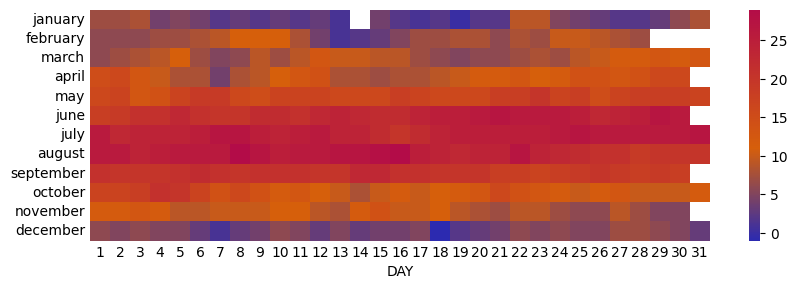

In [157]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.heatmap(df_heat, ax=ax, cmap=grd)
ax.tick_params(axis = u'both', # hide ticks
              which = u'both',
              length = 0
              )